# Decision Trees: Regression

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 



## 1. Required Libraries & Functions

Before we start, we need to import few libraries and functions that we will use in this jupyterbook. You don't need to understand what those functions do for now.

In [13]:
# Libraries
import numpy as np
import pandas as pd
from sklearn import tree
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

## 2. Probelm Representation

Let's recall Chapter X of [the Machine Learning Simplified book](https://themlsbook.com). We have a hypothetical dataset (Table XX in the MLS book) containing 12 days, with first 4 columns as features representing weather consitions and last column as a target variable representing hour of golf that were played that day.


| Day | Temperature | Humidity | Outlook | Wind | Golf Hours Played |
| -- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 1 | Hot | High | Sunny | Weak | 25 | 
| 2  | Hot | High | Sunny | Strong | 30 |
| 3 | Hot | High | Rain | Weak | 42 |
| 4 | Cold | Normal | Rain | Weak | 32 |
| 5 | Cold | Normal | Rain | Strong | 23 |
| 6 | Cold | High | Sunny | Weak | 35 |
| 7 | Cold | Normal | Sunny | Weak | 38 |
| 8 | Hot | Normal | Rain | Weak | 43 |
| 9 | Hot | Normal | Sunny | Strong | 48 |
| 10 | Cold | High | Rain | Strong | 12 |
| 11 | Cold | High | Rain | Weak | 24 |
| 12 | Cold | Normal | Sunny | Strong | 22 |






### 2.1. Create Hypothetical Dataset

Let's re-create aforementioned table in python. We use `pandas` library - a library that manages **PAN**el **DA**ta **S**ets - to do so. Note that we have already imported it in the beginning of this notebook.

In [14]:
#re-create a hypothetical dataset
data = {'Temperature': ["Hot","Hot","Hot","Cold","Cold","Cold","Cold","Hot","Hot","Cold", "Cold", "Cold"],
        'Humidity': ["High","High","High","Normal","Normal","High","Normal","Normal","Normal","High", "High", "Normal"],
        'Outlook': ["Sunny","Sunny","Rain","Rain","Rain","Sunny","Sunny","Rain","Sunny","Rain", "Rain", "Sunny"], 
        'Wind': ["Weak","Strong","Weak","Weak","Strong","Weak","Weak","Weak","Strong","Strong", "Weak", "Strong"],
        'Hours': [25,30,42,32,23,35,38,43,48,12,24,22]
       }  

#transform dataset into a DataFrame df using pandas library
df = pd.DataFrame(data)  
  
#print the output
df


,Temperature,Humidity,Outlook,Wind,Hours
0,Hot,High,Sunny,Weak,25
1,Hot,High,Sunny,Strong,30
2,Hot,High,Rain,Weak,42
3,Cold,Normal,Rain,Weak,32
4,Cold,Normal,Rain,Strong,23
5,Cold,High,Sunny,Weak,35
6,Cold,Normal,Sunny,Weak,38
7,Hot,Normal,Rain,Weak,43
8,Hot,Normal,Sunny,Strong,48
9,Cold,High,Rain,Strong,12


## 3. Root Node

We begin by identifying the feature for the root node.

### 3.1. Calculating Standard Deviation of Hours

To identify a feature that goes as a root node, we start by calculating the standard deviation for the target variable \textit{Golf Hours Played}.  We first calculate the mean of the target variable as follows:
$$
\begin{equation}
    \begin{split}
        \bar{y}
        &=\frac{y_1 + y_2+ y_3 + \ldots  + y_n}{n} \\
        &=\frac{25+30+42+ \ldots  + 24 + 22 }{12} \\
        &=31.17
    \end{split}
\end{equation}
$$

In [15]:
#calculate mean (rounded to 2 decimals)
mean_hours = round((25+30+42+32+23+35+38+43+48+12+24+22)/12, 2)
#print the result
print(f"mean hours (entire dataset) = {mean_hours}")

mean hours (entire dataset) = 31.17


Next, we calculate standard deviation:
$$ \begin{equation*}
    \begin{split}
        S(Hours)
        &= \sqrt{\frac{(y_1-\bar{y})^2+(y_2-\bar{y})^2+(y_3-\bar{y})^2+ \ . \ . \ . \  +(y_n-\bar{y})^2}{n}}  \\
        &=  \sqrt{\frac{(25-31.17)^2+(30-31.17)^2+(42-31.17)^2+ \ . \ . \ . \  +(22-31.17)^2}{12}}  \\ 
        &= 10.05
    \end{split}
\end{equation*} 
$$

In [16]:
#calculating std
s_hours = np.sqrt(((25-mean_hours)**2+
                   (30-mean_hours)**2+
                   (42-mean_hours)**2+
                   (32-mean_hours)**2+
                   (23-mean_hours)**2+
                   (35-mean_hours)**2+
                   (38-mean_hours)**2+
                   (43-mean_hours)**2+
                   (48-mean_hours)**2+
                   (12-mean_hours)**2+
                   (24-mean_hours)**2+
                   (22-mean_hours)**2)/12
                 )

#rounding to 2 decimals
s_hours = round(s_hours,2)

#print the result
print(f"standard deviation for Hours, s_hours={s_hours}")

standard deviation for Hours, s_hours=10.05


In `numpy` library, we can save time and use a method `np.std` that calculates std for us. We will use this method further in this notebook.

In [17]:
#alternatively:
s_hours_with_numpy = np.std([25,30,42,32,23,35,38,43,48,12,24,22])

#round
s_hours_with_numpy = round(s_hours_with_numpy, 2)

#print
print(f's_hours_with_numpy={s_hours_with_numpy}')

s_hours_with_numpy=10.05


### 3.2. Calculating Standard Deviation Reduction

#### 3.2.1. Temperature Variable

Now, let's show how to calculate the standard deviation reduction that would result from splitting on the *Temperature* variable.

Out of the twelve observations in the dataset, we have five observations where the temperature state is *Hot*, and seven observations where it is *Cold*.
For each of these states, we calculate the standard deviation of the target variable for the data points that have this state.

The five data points with *Temperature=Hot* have *Golf Hours Played* values of $25$, $30$, $42$, $43$, and $48$.  These values have a mean of $37.6$ (hours played) and a standard deviation of:
$$
\begin{align*}
    S(Hot) 
    &= \sqrt{\frac{(25-37.6)^2 + (30-37.6)^2 + (42-37.6)^2 + (43-37.6)^2 + (48-37.6)^2}{5}} \\
    &= 8.64
\end{align*}
$$

In [18]:
#calculating std with numpy
s_hot = round(np.std([25,30,42,43,48]), 2)
#print the result
print(f'S(Hot)={s_hot}')

S(Hot)=8.64


Similarly, the seven data points with *Temperature=Cold* have *Golf Hours Played* values of $32$, $23$, $35$, $38$, $12$, $24$, and $22$.  These values have a mean of $26.6$ (hours played) and a standard deviation of:

$$ 
\begin{align*}
    S(Cold)
    &= \sqrt{\frac{(32-26.6)^2+
                    (23-26.6)^2+
                    \ .\ .\ .\ +\
                    (24-26.6)^2+
                    (22-29.3)^2}{7}} \\
    &=8.31
\end{align*}
$$

In [19]:
#calculating std with numpy
s_cold = round(np.std([32,23,35,38,12,24,22]), 2)
#print the result
print(f'S(Hot)={s_cold}')

S(Hot)=8.31


We now put all of these calculations together to compute the standard deviation reduction using the formula:

$$
\begin{equation*}
    \begin{split}
        SDR (Temperature)
        &= S - \Big(
        \frac{n_{Hot}}{n} \cdot S(Hot) + 
        \frac{n_{Cold}}{n} \cdot S(Cold)
        \Big) \\
        %
        &= 10.05 - \Big(
        \frac{5}{12} \cdot 8.64 +
        \frac{7}{12} \cdot 8.31
        \Big) \\
        &= 1.6
    \end{split}
\end{equation*}
$$

In [20]:
#calculate standard deviation reduction
sdr_temp = s_hours - (5/12*s_hot + 7/12*s_cold)

#round to 2 decimals
sdr_temp = round(sdr_temp,2)

#print the output
print("SDR(Temperature) =", sdr_temp)

SDR(Temperature) = 1.6


#### 3.2.2. Humidity Variable

In [21]:
#calculating standard deviation for two states of Humidity
s_high = round(np.std([25,30,42,35,12,24]), 2)
s_normal = round(np.std([32,23,38,43,48,22]), 2)

#calculating standard deviation reduction
sdr_humidity = round(s_hours - (6/12*s_high + 6/12*s_normal), 2)

#print results
print(f"S(High)={s_high} \nS(Normal)={s_normal} \n SDR(Humidity)={sdr_humidity}")

S(High)=9.4 
S(Normal)=9.67 
 SDR(Humidity)=0.52


#### 3.2.3. Outlook Variable

In [22]:
#calculating std for two states of Outlook
s_sunny = round(np.std([25,30,35,38,48,22]), 2)
s_rain = round(np.std([42,32,23,43,12,24]), 2)

#calculating standard deviation reduction
sdr_outlook = round(s_hours - (6/12*s_sunny + 6/12*s_rain), 2)

#print results
print(f"S(Sunny)={s_sunny} \nS(Rain)={s_rain} \n SDR(Outlook)={sdr_outlook}")

S(Sunny)=8.64 
S(Rain)=10.98 
 SDR(Outlook)=0.24


#### 3.2.4. Wind Variable

In [23]:
#calculating std for two states of Wind
s_weak = round(np.std([25,42,32,35,38,43,24]), 2)
s_strong = round(np.std([30,23,48,12,22]), 2)

#calculating standard deviation reduction
sdr_wind = round(s_hours - (7/12*s_weak + 5/12*s_strong), 2)

#print results
print(f"S(Weak)={s_weak} \nS(Strong)={s_strong} \n SDR(Wind)={sdr_wind}")

S(Weak)=7.04 
S(Strong)=11.97 
 SDR(Wind)=0.96


### 3.3. Picking a root node

abc

In [24]:
print(f'''
          SDR(Temperature)={sdr_temp} \n
          SDR(Humidity)={sdr_humidity} \n
          SDR(Outlook)={sdr_outlook} \n
          SDR(Wind)={sdr_wind} \n
                    ''')


          SDR(Temperature)=1.6 

          SDR(Humidity)=0.52 

          SDR(Outlook)=0.24 

          SDR(Wind)=0.96 

                    


We pick *Temperature* as a root node.

![](../../supplements/img/tbm/dt_reg_split_one.png)

## 4. Next Split - Temperature(Hot) branch

### 4.1. Calculating Standard Deviation of Hours

In [25]:
#calculate std (rounded to 2 decimals)
s_hours_temp_hot = round(np.std([25,30,42,43,48]), 2)

#print the result
print(f"std hours (on branch Temperature(Hot)) = {s_hours_temp_hot}")

std hours (on branch Temperature(Hot)) = 8.64


### 4.2. Calculating Standard Deviation Reduction

#### 4.2.1. Humidity

In [26]:
#calculating std for two states of Humidity
s_high_temp_hot = round(np.std([25,30,42]), 2)
s_normal_temp_hot = round(np.std([43,48]), 2)

#calculating standard deviation reduction
sdr_humidity_temp_hot = round(s_hours_temp_hot - (3/5*s_high_temp_hot + 2/5*s_normal_temp_hot), 2)

#print results
print(f"S(High)={s_high_temp_hot} \nS(Normal)={s_normal_temp_hot} \n SDR(Humidity)={sdr_humidity_temp_hot}")

S(High)=7.13 
S(Normal)=2.5 
 SDR(Humidity)=3.36


#### 4.2.2. Outlook

In [27]:
#calculating std for two states of Outlook
s_sunny_temp_hot = round(np.std([25,30,48]), 2)
s_rain_temp_hot = round(np.std([42,43]), 2)

#calculating standard deviation reduction
sdr_outlook_temp_hot = round(s_hours_temp_hot - (3/5*s_sunny_temp_hot + 2/5*s_rain_temp_hot), 2)

#print results
print(f"S(Sunny)={s_sunny_temp_hot} \nS(Rain)={s_rain_temp_hot} \n SDR(Outlook)={sdr_outlook_temp_hot}")

S(Sunny)=9.88 
S(Rain)=0.5 
 SDR(Outlook)=2.51


#### 4.2.3. Wind

In [28]:
#calculating std for two states of Wind
s_weak_temp_hot = round(np.std([25,42,43]), 2)
s_strong_temp_hot = round(np.std([30,48]), 2)

#calculating standard deviation reduction
sdr_wind_temp_hot = round(s_hours_temp_hot - (3/5*s_weak_temp_hot + 2/5*s_strong_temp_hot), 2)

#print results
print(f"S(Weak)={s_weak_temp_hot} \nS(Strong)={s_strong_temp_hot} \n SDR(Wind)={sdr_wind_temp_hot}")

S(Weak)=8.26 
S(Strong)=9.0 
 SDR(Wind)=0.08


## 5. Next Split - Temperature(Cold) branch

### 5.1. Calculating Standard Deviation of Hours

In [29]:
#calculate std (rounded to 2 decimals)
s_hours_temp_cold = round(np.std([32,23,35,38,12,24,22]), 2)

#print the result
print(f"std hours (on branch Temperature(Cold)) = {s_hours_temp_cold}")

std hours (on branch Temperature(Cold)) = 8.31


### 5.2. Calculating Standard Deviation Reduction

#### 5.2.1. Humidity

In [30]:
#calculating std for two states of Humidity
s_high_temp_cold = round(np.std([35,12,24]), 2)
s_normal_temp_cold = round(np.std([32,23,38,22]), 2)

#calculating standard deviation reduction
sdr_humidity_temp_cold = round(s_hours_temp_cold - (3/7*s_high_temp_cold + 4/7*s_normal_temp_cold), 2)

#print results
print(f"S(High)={s_high_temp_cold} \nS(Normal)={s_normal_temp_cold} \n SDR(Humidity)={sdr_humidity_temp_cold}")

S(High)=9.39 
S(Normal)=6.61 
 SDR(Humidity)=0.51


#### 5.2.2. Outlook

In [31]:
#calculating std for two states of Outlook
s_sunny_temp_cold = round(np.std([35,38,22]), 2)
s_rain_temp_cold = round(np.std([32,23,12,24]), 2)

#calculating standard deviation reduction
sdr_outlook_temp_cold = round(s_hours_temp_cold - (3/7*s_sunny_temp_cold + 4/7*s_rain_temp_cold), 2)

#print results
print(f"S(Sunny)={s_sunny_temp_cold} \nS(Rain)={s_rain_temp_cold} \n SDR(Outlook)={sdr_outlook_temp_cold}")

S(Sunny)=6.94 
S(Rain)=7.12 
 SDR(Outlook)=1.27


#### 5.2.3. Wind

In [32]:
#calculating std for two states of Wind
s_weak_temp_cold = round(np.std([32,35,38,24]), 2)
s_strong_temp_cold = round(np.std([23,12,22]), 2)

#calculating standard deviation reduction
sdr_wind_temp_cold = round(s_hours_temp_cold - (4/7*s_weak_temp_cold + 3/7*s_strong_temp_cold), 2)

#print results
print(f"S(Weak)={s_weak_temp_cold} \nS(Strong)={s_strong_temp_cold} \n SDR(Wind)={sdr_wind_temp_cold}")

S(Weak)=5.21 
S(Strong)=4.97 
 SDR(Wind)=3.2


## 6. Put everything together

In [33]:
print(f'''branch: Temperature(Hot) \n 
                    SDR(Humidity)={sdr_humidity_temp_hot} \n
                    SDR(Outlook)={sdr_outlook_temp_hot} \n
                    SDR(Wind)={sdr_wind_temp_hot} \n \n
          branch: Temperature(Cold) \n 
                    SDR(Humidity)={sdr_humidity_temp_cold} \n
                    SDR(Outlook)={sdr_outlook_temp_cold} \n
                    SDR(Wind)={sdr_wind_temp_cold} \n \n
                    ''')

branch: Temperature(Hot) 
 
                    SDR(Humidity)=3.36 

                    SDR(Outlook)=2.51 

                    SDR(Wind)=0.08 
 

          branch: Temperature(Cold) 
 
                    SDR(Humidity)=0.51 

                    SDR(Outlook)=1.27 

                    SDR(Wind)=3.2 
 

                    


## 7. Decision Tree in Real Projects

### 7.1. Preparing the dataset

In [34]:
df_enc = pd.get_dummies(df)

Let us split data into dependent and independant variables. Matrix of independant variables we will call `X`. Vector of dependant variable we will call `y`.

In [35]:
# X = df[["Outlook", "Humidity", "Temperature", "Wind"]].values
X = df_enc[["Temperature_Cold","Outlook_Rain", "Humidity_Normal", "Wind_Strong"]]
y = df_enc.Hours.values

### 7.2. Building a Decision Tree

Above we made a bunch of steps to manually calculate the split for a simple decision tree for regression. There was a lot of calculations just to understand what split we have to make for two independent variables. What if we had 10 independent variables that would require numerous splits to make? Imagine how many calculations we would do in that case. Good news: there is a library - `sklearn` - that does all the calculations for us. Basically, `sklearn` does all the steps for you, so that you can implement a decision tree with 2 lines of code. Let's have a look.


In [36]:
# Initialize the model
clf = DecisionTreeRegressor()

In [37]:
# Train the model
clf.fit(X, y)

DecisionTreeRegressor()

### 7.3. Checking models accuracy

After the model has trained with the data, it's essential to understand how precisely it makes predictions. For that, we need to check model's accuracy. 

In [38]:
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X, y):.2f}')

Accuracy of Decision Tree classifier on training set: 1.00


### 7.4. Understanding trained model

It's always good to understand the logic of a trained model. We can do so by using `tree.export_text` method.

In [39]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- value: [25.00]
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- value: [30.00]
|   |   |--- feature_1 >  0.50
|   |   |   |--- value: [42.00]
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- value: [43.00]
|   |   |--- feature_3 >  0.50
|   |   |   |--- value: [48.00]
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- value: [35.00]
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- value: [38.00]
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- value: [24.00]
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- value: [32.00]
|   |--- feature_3 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- value: [12.00]
|   |   |--- feature_2 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |

We can also make it a bit more visually pleasant and more understandable by using `tree.plot_tree` method.

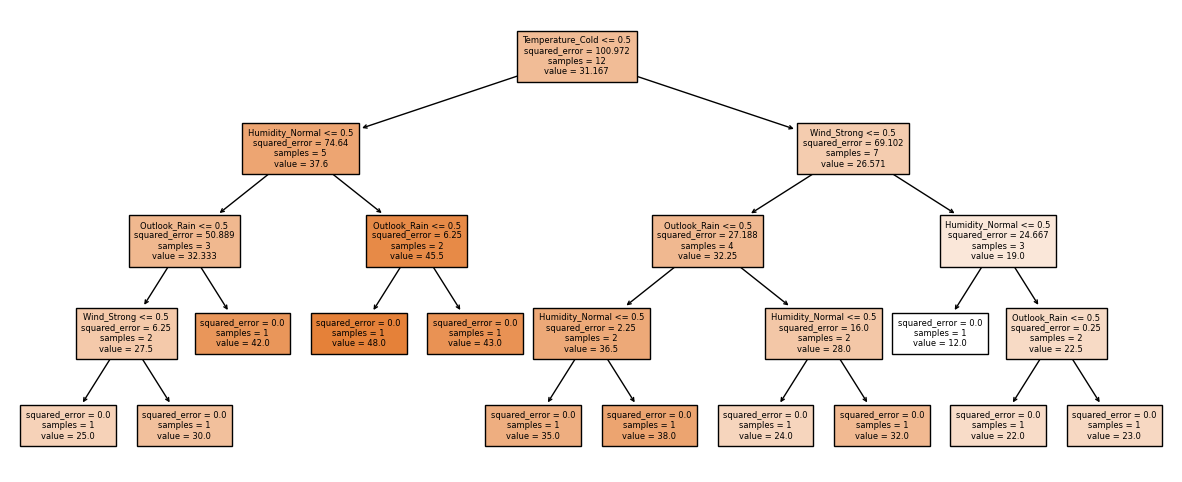

In [40]:
clf = DecisionTreeRegressor(max_depth=10)
clf.fit(X,y)

plt.figure(figsize=(15,6))
fig_tree = tree.plot_tree(clf, 
                          fontsize=6,
                          feature_names=["Temperature_Cold", "Outlook_Rain", "Humidity_Normal", "Wind_Strong"],
#                           class_names=['no disease', 'disease'],
                          filled=True)

### 7.5. Making Predictions

Finally, you can predict how much hours will be played on a particular day based on the weather conditions. For that, we need to pass feature values to the model. We are going to use `predict` method.

In [41]:
#Predicting a class with random values x and y

Temperature_Cold=1
Outlook_Rain=0
Humidity_Normal=1
Wind_Strong=0

clf.predict([[Temperature_Cold,
              Outlook_Rain,
              Humidity_Normal,
              Wind_Strong
             ]])

/Users/andrewwolf/.pyenv/versions/3.10.7/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([38.])

## 8. Further Readings

Check out more details on Decision Trees: http://localhost:8890/notebooks/Classification/decision_trees.ipynb